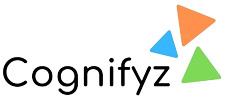

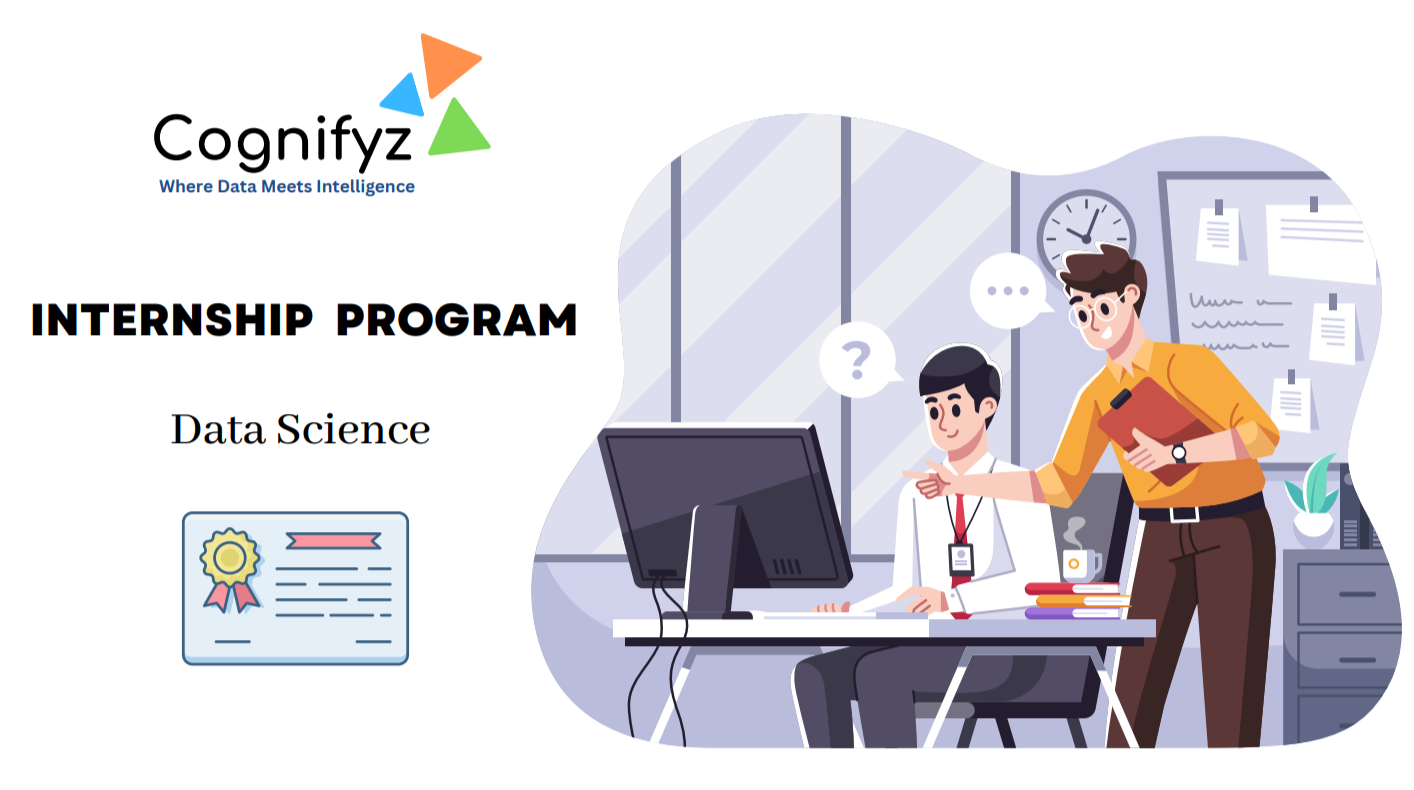

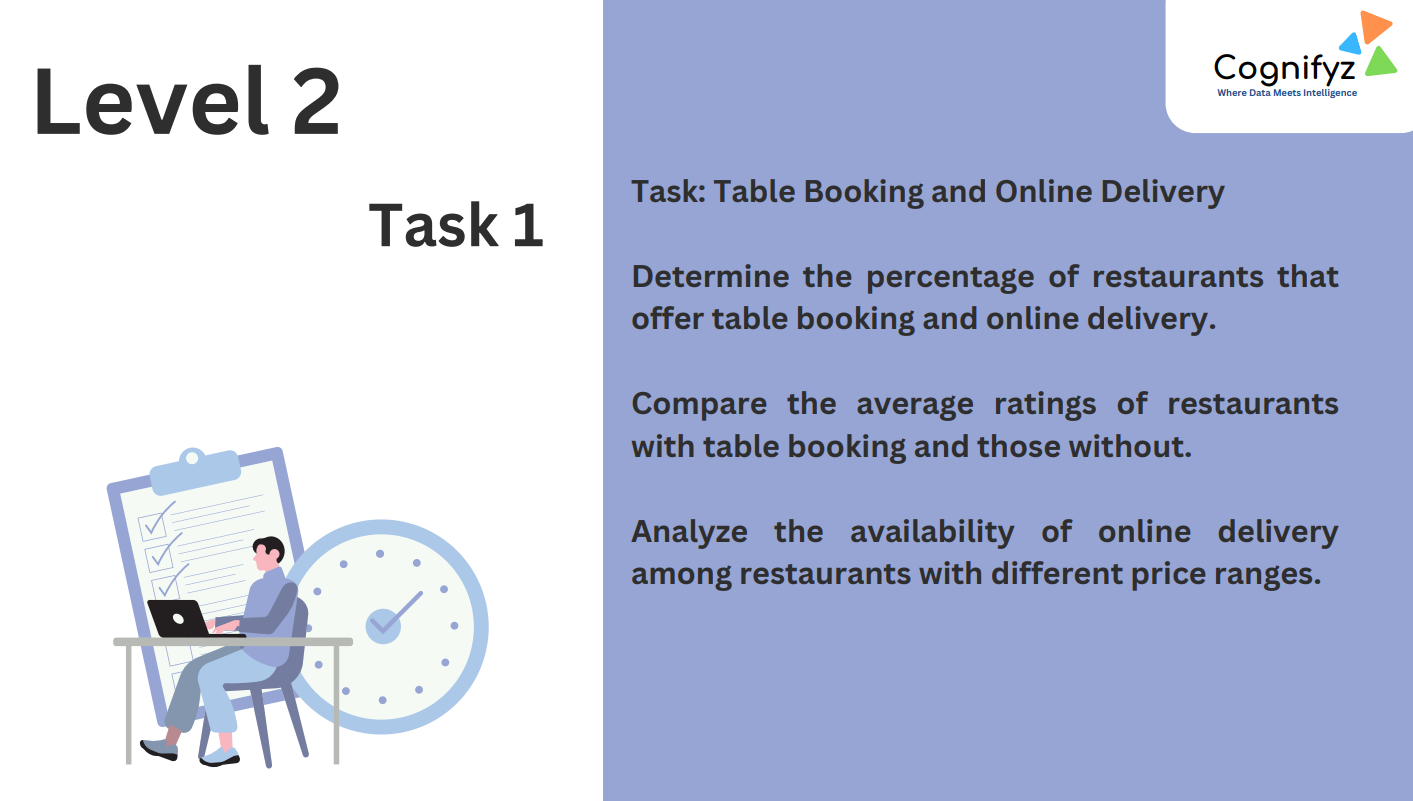

# Task 1: Table Booking and Online Delivery

1. Determine the percentage of restaurants that offer table booking and online delivery.


2. Compare the average ratings of restaurants with table booking and those without.


3. Analyze the availability of online delivery among restaurants with different price ranges.

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df=pd.read_csv('cognifyz Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


##### 1. Determine the percentage of restaurants that offer table booking and online delivery.

In [3]:
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [4]:
table_booking_percentage = (df['Has Table booking'].sum() / len(df)) * 100
online_delivery_percentage = (df['Has Online delivery'].sum() / len(df)) * 100

print(f"Percentage of restaurants offering table booking: {table_booking_percentage: .2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage: .2f}%")

Percentage of restaurants offering table booking:  12.12%
Percentage of restaurants offering online delivery:  25.66%


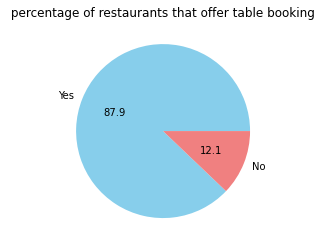

In [9]:
# visualizing the percentage of restaurants that offer table booking 
colo=['skyblue', 'lightcoral']
plt.pie(df['Has Table booking'].value_counts(),labels=['Yes','No'],autopct="%0.1f", colors= colo)
plt.title(' percentage of restaurants that offer table booking ')
plt.show()

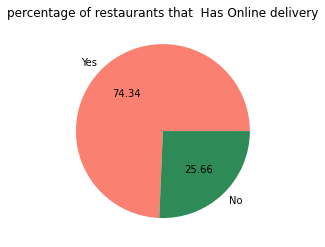

In [12]:
# visualizing the percentage of restaurants that  Has Online delivery
colo1=['salmon', 'seagreen']
plt.pie(df['Has Online delivery'].value_counts(),labels=['Yes','No'],autopct="%0.2f", colors=colo1)
plt.title('percentage of restaurants that  Has Online delivery')
plt.show()

##### 2. Compare the average ratings of restaurants with table booking and those without.

In [13]:
average_ratings_by_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()

print("Average ratings by Table Booking:")
print(average_ratings_by_table_booking)

Average ratings by Table Booking:
Has Table booking
0    2.559359
1    3.441969
Name: Aggregate rating, dtype: float64


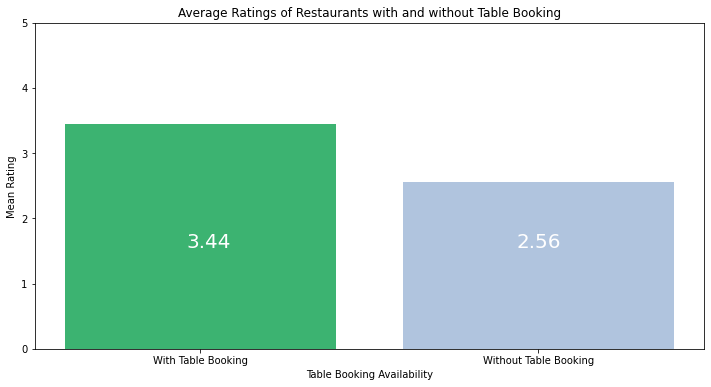

In [38]:
# Calculate mean ratings for restaurants with and without table booking
mean_rating_with_booking = df[df['Has Table booking'] == 1]['Aggregate rating'].mean()
mean_rating_without_booking = df[df['Has Table booking'] == 0]['Aggregate rating'].mean()

# Set up the figure
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(['With Table Booking', 'Without Table Booking'], [mean_rating_with_booking, mean_rating_without_booking], color=['mediumseagreen', 'lightsteelblue'])

# Adding title and labels
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.xlabel('Table Booking Availability')
plt.ylabel('Mean Rating')
plt.ylim(0, 5)

# Display mean ratings on top of the bars
plt.text(0.025, 1.5, f"{mean_rating_with_booking:.2f}", ha='center', va='bottom', color='white', fontsize=20)
plt.text(1, 1.5, f"{mean_rating_without_booking:.2f}", ha='center', va='bottom', color='white', fontsize=20)

# Show the plot
plt.show()

##### 3. Analyze the availability of online delivery among restaurants with different price ranges.

In [20]:
price_range_groupes = df.groupby('Price range')

online_delivery_percentage_by_price_range = (price_range_groupes['Has Online delivery'].value_counts(normalize=True) * 100).unstack()

print("Percentage of restaurants offering online delivery by price range:")
print(online_delivery_percentage_by_price_range)

Percentage of restaurants offering online delivery by price range:
Has Online delivery          0          1
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


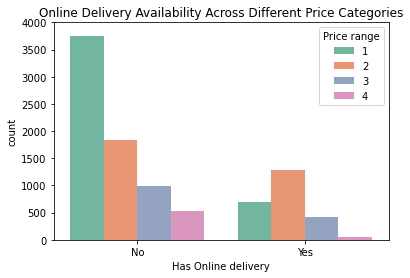

In [37]:
# Plotting the countplot with hue and a different color palette
sns.countplot(x='Has Online delivery', hue='Price range', data=df[['Has Online delivery', 'Price range']], palette="Set2")

# Setting y-axis ticks
plt.yticks(range(0, 4500, 500))

# Renaming x-axis labels from 0 and 1 to 'No' and 'Yes'
plt.xticks([0, 1], ['No', 'Yes'])

# Adding a title
plt.title('Online Delivery Availability Across Different Price Categories')

# Display the plot
plt.show()

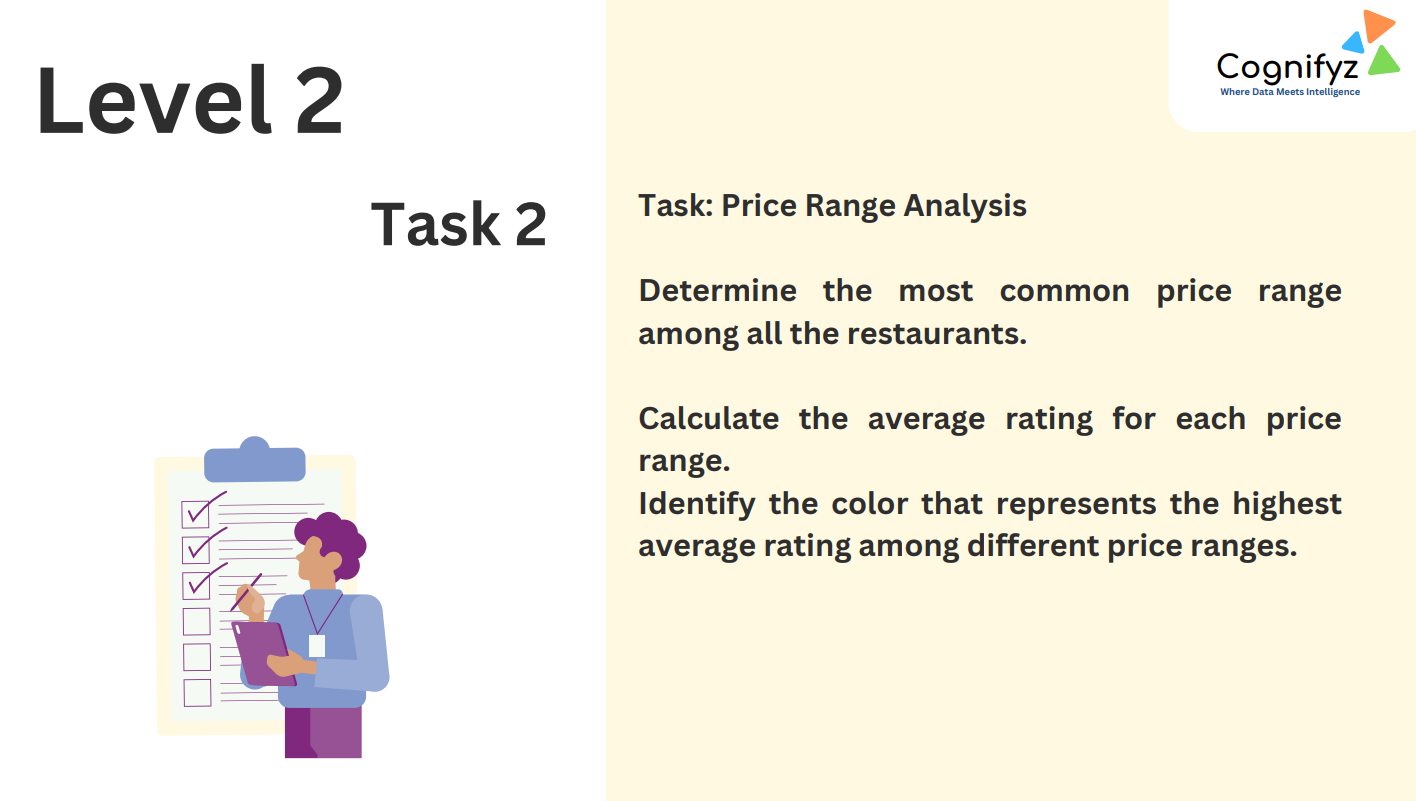

# Task 2 : Price Range Analysis

1. Determine the most common price range among all the restaurants.


2. Calculate the average rating for each price range.


3. Identify the color that represents the highest average rating among different price ranges.

##### 1. Determine the most common price range among all the restaurants.

In [39]:
# To determine most common price range we can use mode function to calculate what is most common price range 

mode_price_range= df['Price range'].mode()[0]
print("The Most Common Price Range Among All The Restaurants", mode_price_range)

The Most Common Price Range Among All The Restaurants 1


##### 2. Calculate the average rating for each price range.

In [68]:
#average rating for each price range

x=[round(df[df['Price range']==i]['Aggregate rating'].mean(),1) for i in range(1,5)]
avg_rating=pd.DataFrame({'Price range':[1,2,3,4],'Average rating':x})

avg_rating

,Price range,Average rating
0,1,2.0
1,2,2.9
2,3,3.7
3,4,3.8


##### 3. Identify the color that represents the highest average rating among different price ranges.

In [70]:
# color that represents the highest average rating among different price ranges

avg_max=avg_rating['Average rating'].max()
avg_max_price_range=avg_rating[avg_rating['Average rating']==avg_max]['Price range'].iloc[0]
df[ (df['Aggregate rating']==avg_max) & (df['Price range']==avg_max_price_range )]['Rating color'].iloc[0]

'Yellow'

Color of the Highest Average Rating: [0.993248 0.906157 0.143936 1.      ]


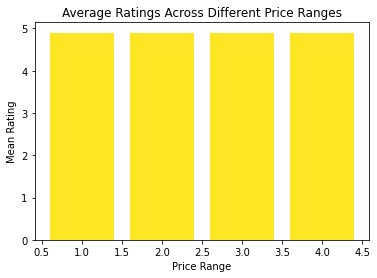

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a gradient color scale using seaborn
color_palette = sns.color_palette("viridis", as_cmap=True)

# Map the color scale to the ratings and extract colors
colors = color_palette(df['Aggregate rating'])

# Find the index of the maximum rating
max_rating_index = df['Aggregate rating'].idxmax()

# Identify the color corresponding to the highest rating
color_of_highest_rating = colors[max_rating_index]

# Print or use the color as needed
print("Color of the Highest Average Rating:", color_of_highest_rating)

#Plotting a bar chart with colors
plt.bar(df['Price range'], df['Aggregate rating'], color=colors)
plt.title('Average Ratings Across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Mean Rating')
plt.show()

"Yellow" is the color for the highest average rating among different price ranges.

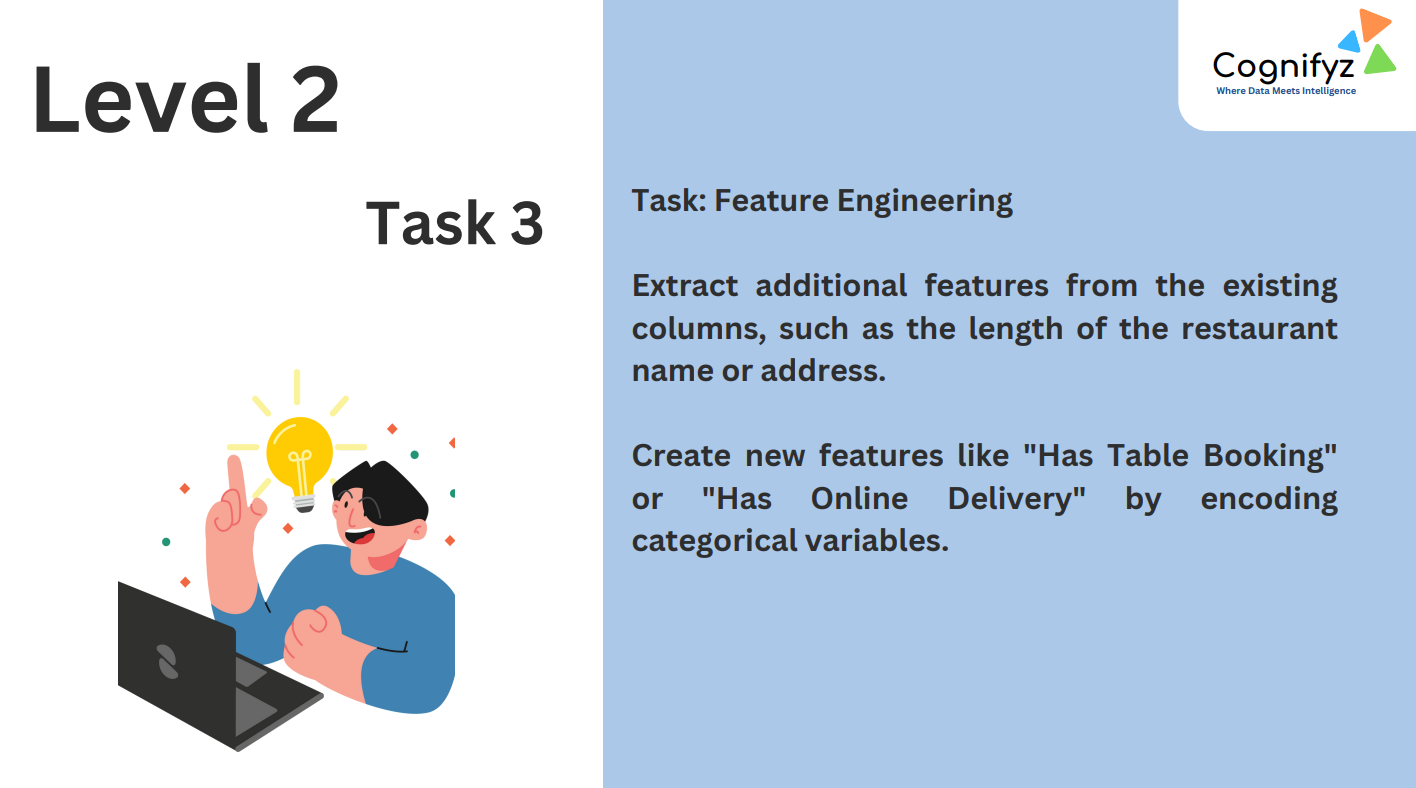

# Task 3 : Feature Engineering

1. Extract additional features from the existing columns, such as the length of the restaurant name or address.


2. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables

##### 1. Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [53]:
df['Length of restaurant name'] = df['Restaurant Name'].apply(len)
df['Length of address'] = df['Address'].apply(len)

In [54]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Length of restaurant name,Length of address
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,0,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,No,No,4,4.8,Dark Green,Excellent,229,11,64


##### 2. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables

In [55]:
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [56]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Length of restaurant name,Length of address,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,0,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,0,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,0,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,0,0


In [58]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Length of restaurant name',
 'Length of address',
 'Has Table Booking',
 'Has Online Delivery']